In [5]:
from heston import*
import numpy as np
import pandas as pd

In [6]:
## Filtre APF

In [7]:
import matplotlib.pyplot as plt
def plot_data(data, labels = ["Simulated Returns"], title=""):
    
    # Plotting the simulated return
    plt.figure(figsize=(10, 4))
    for df, label in zip(data, labels):
        plt.plot(df, label=label)
    plt.title(title)
    plt.legend()
    plt.show()

In [8]:
S0 = 100
K = 100
tau = 1
lamda = 4
v_bar = 0.03
rho = -0.5
sigma = 0.1
eta = 0.4
r = 0.05

np.random.seed(90)
S, C, v = SimHeston(S0, K, tau, r, lamda, v_bar, rho, sigma, eta, size = 252)

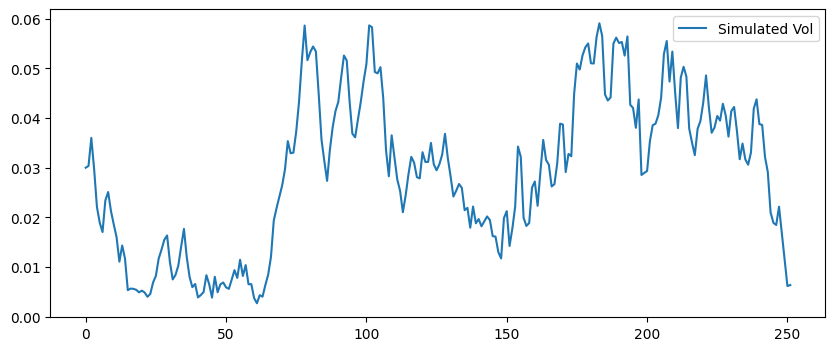

In [9]:
plot_data([v],["Simulated Vol"])

In [ ]:
M= 5
boot_vol = Bootstrap_Heston(C, S, K, tau, r, lamda, v_bar, rho, sigma, eta, M=M)
apf_vol = APF(C, S, K, tau, r, lamda, v_bar, rho, sigma, eta, M=M)
apf_modif_vol = APF_modified(C, S, K, tau, r, lamda, v_bar, rho, sigma, eta, M=M)

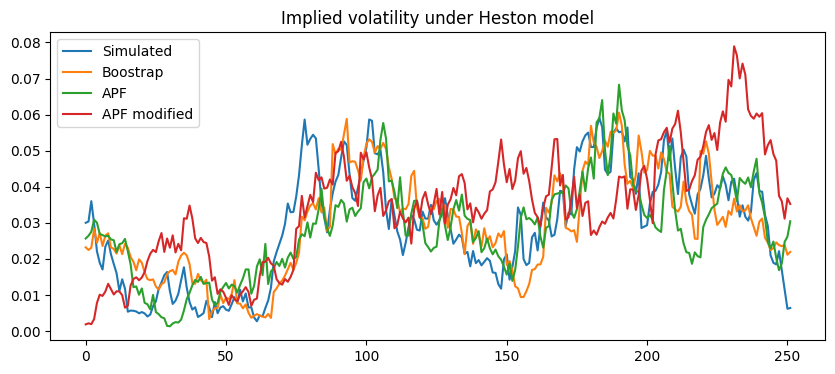

In [18]:
plot_data([v, boot_vol, apf_vol, apf_modif_vol],["Simulated", "Boostrap", "APF", "APF modified"], title = "Implied volatility under Heston model")

In [19]:
C_pred_bootsrtap = np.array([heston(stock_price = S[t],
                         initial_vol = boot_vol[t],
                         kappa = lamda,
                         theta = v_bar, 
                         lambd = eta, 
                         rho = rho, 
                         r = r, 
                         T = tau,
                         K = K) for t in range(len(S))])

C_pred_apf = np.array([heston(stock_price = S[t],
                         initial_vol = apf_vol[t],
                         kappa = lamda,
                         theta = v_bar, 
                         lambd = eta, 
                         rho = rho, 
                         r = r, 
                         T = tau,
                         K = K) for t in range(len(S))])

C_pred_apf_modif = np.array([heston(stock_price = S[t],
                         initial_vol = apf_modif_vol[t],
                         kappa = lamda,
                         theta = v_bar, 
                         lambd = eta, 
                         rho = rho, 
                         r = r, 
                         T = tau,
                         K = K) for t in range(len(S))])


In [20]:
mse_bootstrap = np.mean((v-boot_vol)**2)
mse_apf = np.mean((v-apf_vol)**2)
mse_apf_modif = np.mean((v-apf_modif_vol)**2)

print("MSE BOOTSTRAP:\t", mse_bootstrap)
print("MSE APF:\t", mse_apf)
print("MSE APF modified:\t", mse_apf_modif)

MSE BOOTSTRAP:	 8.703079650135153e-05
MSE APF:	 9.99355668021826e-05
MSE APF modified:	 0.000251778539032585


In [21]:
mse_bootstrap = np.mean((C-C_pred_bootsrtap)**2)
mse_apf = np.mean((C-C_pred_apf)**2)
mse_apf_modif = np.mean((C-C_pred_apf_modif)**2)

print("MSE BOOTSTRAP:\t", mse_bootstrap)
print("MSE APF:\t", mse_apf)
print("MSE APF modified:\t", mse_apf_modif)

MSE BOOTSTRAP:	 0.10779500449440597
MSE APF:	 0.11536020017808099
MSE APF modified:	 0.1936650729643402


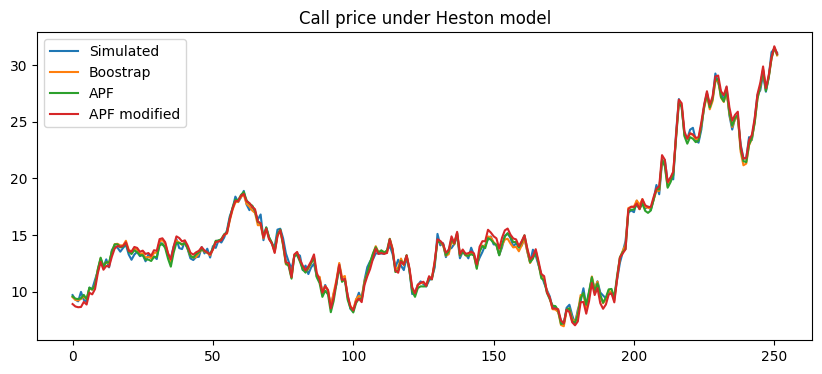

In [22]:
plot_data([C, C_pred_bootsrtap, C_pred_apf, C_pred_apf_modif],["Simulated", "Boostrap", "APF", "APF modified"], title = "Call price under Heston model")

In [ ]:
num_particules = [100, 200, 500, 1000]

performances = {"MSE BOOTSTRAP": [],
                "MSE APF": [],
                "MSE APF modified" : []
                }

performances_vol = {"MSE BOOTSTRAP": [],
                "MSE APF": [],
                "MSE APF modified" : []
                }
for M in num_particules:
    boot_vol = Bootstrap_Heston(C, S, K, tau, r, lamda, v_bar, rho, sigma, eta, M=M)
    apf_vol = APF(C, S, K, tau, r, lamda, v_bar, rho, sigma, eta, M=M)
    apf_modif_vol = APF_modified(C, S, K, tau, r, lamda, v_bar, rho, sigma, eta, M=M)

    C_pred_bootsrtap = np.array([heston(stock_price = S[t],
                            initial_vol = boot_vol[t],
                            kappa = lamda,
                            theta = v_bar, 
                            lambd = eta, 
                            rho = rho, 
                            r = r, 
                            T = tau,
                            K = K) for t in range(len(S))])

    C_pred_apf = np.array([heston(stock_price = S[t],
                            initial_vol = apf_vol[t],
                            kappa = lamda,
                            theta = v_bar, 
                            lambd = eta, 
                            rho = rho, 
                            r = r, 
                            T = tau,
                            K = K) for t in range(len(S))])

    C_pred_apf_modif = np.array([heston(stock_price = S[t],
                            initial_vol = apf_modif_vol[t],
                            kappa = lamda,
                            theta = v_bar, 
                            lambd = eta, 
                            rho = rho, 
                            r = r, 
                            T = tau,
                            K = K) for t in range(len(S))])
    
    performances_vol["MSE BOOTSTRAP"].append(np.mean((v-boot_vol)**2))
    performances_vol["MSE APF"].append(np.mean((v-apf_vol)**2))
    performances_vol["MSE APF modified"].append(np.mean((v-apf_modif_vol)**2))

    performances["MSE BOOTSTRAP"].append(np.mean((C-C_pred_bootsrtap)**2))
    performances["MSE APF"].append(np.mean((C-C_pred_apf)**2))
    performances["MSE APF modified"].append(np.mean((C-C_pred_apf_modif)**2))
    
performances = pd.DataFrame(performances)
performances_vol = pd.DataFrame(performances_vol)

performances.to_csv("peformance.csv", index=False)
performances_vol.to_csv("peformance_vol.csv", index=False)

In [ ]:
#performances = pd.DataFrame(performances)
#performances_vol = pd.DataFrame(performances_vol)

#performances.to_csv("peformance.csv", index=False)
#performances_vol.to_csv("peformance_vol.csv", index=False)

<Axes: >

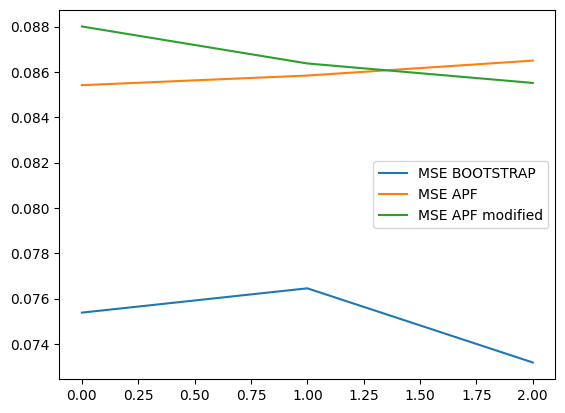

In [17]:
performances.plot()

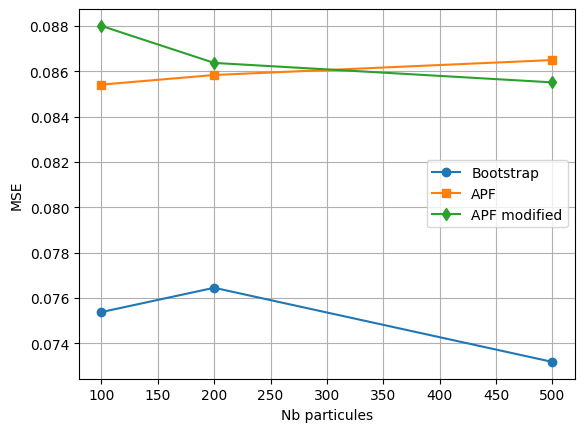

In [37]:
# Labels for different performance metrics
labels = ["Bootstrap", "APF", "APF modified"]
markers = ['o', 's', 'd']  # Different markers for each metric

# Plot each performance column separately
for i in range(performances.shape[1]):
    plt.plot([100,200,500], performances.iloc[:,i], marker=markers[i], linestyle='-', label=labels[i])

# Add grid, legend, and labels
plt.grid(True)
plt.xlabel("Nb particules")
plt.ylabel("MSE")
plt.legend()

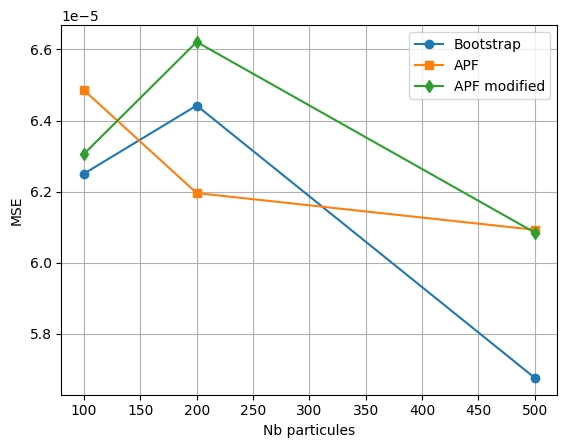

In [38]:
# Labels for different performance metrics
labels = ["Bootstrap", "APF", "APF modified"]
markers = ['o', 's', 'd']  # Different markers for each metric

# Plot each performance column separately
for i in range(performances_vol.shape[1]):
    plt.plot([100,200,500], performances_vol.iloc[:,i], marker=markers[i], linestyle='-', label=labels[i])

# Add grid, legend, and labels
plt.grid(True)
plt.xlabel("Nb particules")
plt.ylabel("MSE")
plt.legend()